# Final Project: Women in Tech

## Python for Data Analysis Training Program

_Written by Team "Diversity-in-Tech" in March-April 2020_

## 1. Introduction

__About the Project's Topic and the Broad Context__

There are assumptions made that female engineers are unrepresented in companies operating in the technology sector. This is something that is beneficial to study in length and in various ways. There are several existing studies shared publicly. One of these studies was written by Tara Siegel in 2014.

It is the belief of our team that interesting findings can be made by looking at the representation of women in the technology sector of the recent past. These findings - collected in this project - could perhaps one day inspire others to conduct similar studies and by that add to the pool of research made on the topic.

__Background__

This project was written by Yongbing Tao-Topinoja, Sejal Seth and Rami Laaksonen. Our three-member team represents diverse nationalities, academic backgrounds and past fields of work. The project forms the team's final project for the Python for Data Analysis training program. The training program was organized by The Shortcut Oy in Helsinki, Finland from February until April 2020.

__What Do We Hope To Learn?__

The aim of this project is to explore the selected dataset. Through that we hope primarily to learn how to best analyse, visualize and present a dataset and the results in an understandable way. 

As secondary learning objectives the project allows us to hone our team working skills as well as the use of remote working tools and applications. Due to the ongoing COVID-19 situation the majority of this project and team working has been made remotely. This has given us the opportunity to gain experience in using various remote applications ranging from communication systems through cloud storage up to e-learning platforms.

__Questions Addressed__

The questions that are being addressed by this project are as follows:

- Are there any interesting correlations found in the dataset?
- Can we measure the female-to-male ratio in companies in general?
- How does the female-to-male ratio in companies look when sorted by various company categories?
- Can we determine in which company category the number of females is the highest?
- Can we determine in which location the number of female engineers is the highest?
- Can we determine the effects, if any, of company funding to the female-to-male ratio?

In addition to the main questions there may be other findings found during the data exploration. These additional findings will be included in the report as well.

__Of the Project's Importance__

This project is important because it allows us to apply our learning of data analytics, Python programming language and Machine Learning in the creation a project simulating a potential real-life case.

In addition the project may lead to other projects that are based on it. Because of this the project can be said to contribute to the research on the representation of women in tech companies. Our team considers these potential long-term effects very important and finds them highly motivating.

## 2. Dataset


This project uses a single dataset. The dataset in question was written by Tara Siegel, a Senior Software Engineer working at the time of this writing at Group Nine Media in New York, The United States.

The dataset was published on GitHub in 2014 and last updated on 8 May 2014. According to the description found on Siegel's GitHub repository's the dataset is about visualization of data regarding small tech companies' representation of females.

Siegel explains that the data her dataset is based on was obtained from public and crowdsourced sources. She also mentions that the data was originally combined by an engineer working at Pintrest, Tracy Chou.

Further, Siegel informs that the sizes, funcing and the categories the companies belong to are obtained from CrunchBase. She also mentions that her final work is in the form of a website, which can be found at URL: http://www.tarasiegel.com/wics

In order not to get any influences from her outcome our team has not used her final results. Additionally, where Siegel used JavaScript our team has used Python and Jupyter Notebook as the language and applications instead.

__About the Dataset__

Tara Siegel's companies.csv dataset has 123 rows. In it's original format the dataset contains the following columns:

- key	
- Company
- Num. of Female Engineers	
- male_eng	
- Total Engineers	
- Percent Female Engineers	
- Total Employees	
- Location	
- Funding (Mil)	
- Category	
- Website	
- grace_hopper

__About Grace Hopper__

As a possible anomaly the column titled "grace_hopper" was examined further. According to our research the name refers to late Grace Brewster Murray Hopper (1906-1992), who was a computer scientist and a Rear Admiral in the United States Navy.

It is our team's deduction that the column name could refer to a technology award that carries her name. While our team has the highest respect for Rear Admiral Grace Hopper and her work the column was left unused for the purposes of using this dataset.

## 3. Preprocessing

In this chapter the dataset is prepared. This is done by importing the necessary libraries, accessing and reading the dataset, which is in Comma-separated values file format. After this the file contents and formatting are viewed.

When the dataset has been examined by the surface the data cleaning process is begun. In this part all unnecessary columns and rows are dropped. The columns are also renamed for increased usability. With these actions the dataframe is then ready for use.

In the Exploratory Data Analysis (EDA) part further changes are made and new dataframes created of the main one. The purpose of this EDA is to find out if there are any interesting findings in the dataset. The main methods are the examination of possible correlations and visualizing the dataframe using pair plots.

Finally, machine learning is being used on the dataset. The _k_-means clustering algorithm is used to predict the ratio of female engineers by company categories.

### 3.1 Preparing the Dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the CSV file
url_tech = 'https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv'

In [3]:
# Reading the file
tech = pd.read_csv(url_tech, index_col=[0])

In [4]:
# Checking the contents
tech.head()

,Company,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Location,Funding (Mil),Category,Website,grace_hopper
key,,,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software,http://www.37signals.com,NaN
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,http://www.7digital.com,NaN
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,http://www.activison.com,NaN
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,http://www.adzerk.com,NaN
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,http://www.airbnb.com,YES


In [5]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 37signals to zerocater
Data columns (total 11 columns):
Company                     122 non-null object
Num. of Female Engineers    122 non-null int64
male_eng                    122 non-null int64
Total Engineers             122 non-null int64
Percent Female Engineers    122 non-null float64
Total Employees             121 non-null float64
Location                    120 non-null object
Funding (Mil)               121 non-null float64
Category                    121 non-null object
Website                     121 non-null object
grace_hopper                9 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 11.4+ KB


In [6]:
tech.shape

(122, 11)

In [7]:
# Describing the dataset
tech.describe()

,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Funding (Mil)
count,122.000000,122.000000,122.000000,122.000000,121.000000,121.000000
mean,8.819672,62.795082,71.614754,16.571885,296.752066,78.820529
std,50.035032,355.165005,405.057009,16.678773,1535.100981,422.906491
min,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
25%,1.000000,6.000000,7.000000,6.260000,25.000000,0.650000
50%,2.000000,16.000000,18.500000,13.535000,66.000000,10.500000
75%,5.000000,29.000000,34.250000,21.072500,162.000000,31.200000
max,553.000000,3907.000000,4460.000000,100.000000,16779.000000,4596.067000


### 3.2 Data Cleaning

In this section the unnecessary columns and a sum row are dropped. Some columns are also renamed to improve the data's usability. The dataframe's contents are made uniform as well. 

In [8]:
# Drop unnecessary columns off
tech = tech.drop(columns=['Website'])
tech = tech.drop(columns=['grace_hopper'])

In [9]:
# Renaming columns
tech = tech.rename(columns = {"Num. of Female Engineers": "female_eng", "Total Engineers": "total_eng", "Percent Female Engineers": "PC_female_eng", "Total Employees": "total_employees", "Funding (Mil)": "funding_Mil"})

In [10]:
# Check NaN items
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    1
Location           2
funding_Mil        1
Category           1
dtype: int64

In [11]:
# Check 'ALL' in 'Company'
tech_all = tech[tech['Company'] == 'ALL']
tech_all

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
all,ALL,553,3907,4460,12.4,16779.0,NaN,4596.067,NaN


In [12]:
# Dropping row 'ALL' from 'Company'
tech = tech[tech['Company'] != 'ALL']

In [13]:
# Fillling 'null' with '0' in column total_employees
tech.total_employees=tech['total_employees'].fillna(0)

In [14]:
# Filling 'null' with '0' in column 'Location'
tech.Location=tech['Location'].fillna(0)

In [15]:
# Filling 'null' with '0' in column funding_Mil
tech.funding_Mil=tech['funding_Mil'].fillna(0)

In [16]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 37signals to zerocater
Data columns (total 9 columns):
Company            121 non-null object
female_eng         121 non-null int64
male_eng           121 non-null int64
total_eng          121 non-null int64
PC_female_eng      121 non-null float64
total_employees    121 non-null float64
Location           121 non-null object
funding_Mil        121 non-null float64
Category           121 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 9.5+ KB


In [17]:
tech['Category'].unique()

array(['Software', 'Consumer Web', 'Games/Entertainment', 'Advertising',
       'Charity/Nonprofit', 'Health/CleanTech', 'Mobile/Wireless',
       'Education', 'Consulting', 'eCommerce/Fashion', 'Enterprise',
       'News/Media', 'Social Networking', 'Finance/Venture',
       'Analytics/Big Data', 'Hardware'], dtype=object)

In [18]:
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    0
Location           0
funding_Mil        0
Category           0
dtype: int64

In [19]:
tech_df0 = tech[(tech[['Location']] == 0).all(axis=1)]
tech_df0

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
squareroot,square-root.com,2,6,8,25.0,26.0,0,0.0,Enterprise


As can be seen above one company has the location value of "0". For the purposes of this study it is the decision of our team to leave out the company from the dataframe.

In [20]:
# Removing the row with location value of "0"

tech = tech.drop(index="squareroot")
tech.head()

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web


### 3.3 Exploratory Data Analysis

In this section we use Exploratory Data Analysis (EDA) to look for interesting findings. 

In [21]:
# Checking the shape of the array
tech.shape

(120, 9)

As can be seen there are 120 rows and 9 columns in the array.

In [22]:
# Checking the unique number of categories in the array
tech['Category'].unique()
len(tech['Category'].unique())

16

As shown above there are 16 categories for the companies of the array.

In [23]:
# Viewing the row in the first index position of the array
tech.iloc[0]

Company            37signals
female_eng                 0
male_eng                  20
total_eng                 20
PC_female_eng              0
total_employees           20
Location                  IL
funding_Mil                0
Category            Software
Name: 37signals, dtype: object

When viewing the company in the first index position we can have an overview of what the output looks like. At a glance it can be seen that the data cleaning has been successful. This is a good sign for the future EDA analysis.

In [24]:
# Creating a new dataframe with a new grouping
gb_tech = tech.groupby('Category')
gb_tech

A new dataframe is created for future use. It is split by company categories.

In [25]:
# Viewing the company categories by male, female and total engineers as well as by total number of employees.
gb_tech[['female_eng', 'male_eng', 'total_eng', 'total_employees']].sum()

,female_eng,male_eng,total_eng,total_employees
Category,,,,
Advertising,28,165,193,871.0
Analytics/Big Data,9,53,62,218.0
Charity/Nonprofit,9,94,103,266.0
Consulting,12,62,74,120.0
Consumer Web,174,1309,1483,6610.0
Education,20,151,171,865.0
Enterprise,26,165,191,984.0
Finance/Venture,13,55,68,521.0
Games/Entertainment,1,29,30,706.0


It is now possible to view the company categories based on male, female and total engineers as well as by the total number of employees.

This kind of information can then be further sorted as per the needs of the end user. The sorted data is then directly usable by, for example management as it can support decision making.

In [26]:
# Rounding up to 2 points after decimal
tech.round({"funding_Mil":2}).head()

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web


As seen above the percentages of company funding is rounded up to 2 decimals. Again this can assist in the viewing of the array and the data by non-data analyst readers.

In [27]:
# Resetting the Index
tech.reset_index(drop=True, inplace=True)
tech.head().round(2)

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web


For future use the array's index is reset. It now runs from 0 onwards.

### 3.3.1 Correlations and Relationships

In [28]:
# Checking the correlations of the data
tech.corr()

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil
female_eng,1.000000,0.856112,0.881650,0.042943,0.589239,0.316192
male_eng,0.856112,1.000000,0.998666,-0.172333,0.606049,0.285245
total_eng,0.881650,0.998666,1.000000,-0.153075,0.612273,0.292056
PC_female_eng,0.042943,-0.172333,-0.153075,1.000000,-0.119091,-0.101973
total_employees,0.589239,0.606049,0.612273,-0.119091,1.000000,0.439784
funding_Mil,0.316192,0.285245,0.292056,-0.101973,0.439784,1.000000


We check for any interesting correlations in the data based on the applicable columns.

As can be seen there are little findings here. The exception is the correlation of company funding with the total number of employees. This would indicate that the bigger the funding of a company is the more workforce it usually employs.

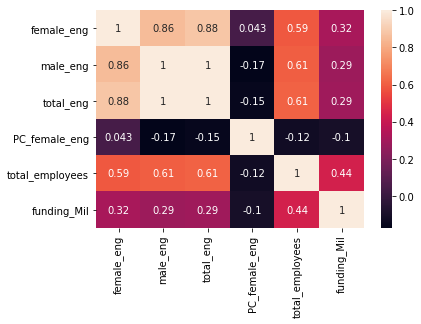

In [29]:
# Use Seaborn's heatmap to plot the correlation matrix of employees and fundings
corr_tech = tech.corr()
corr_heatmap = sns.heatmap(corr_tech, annot=True)

The correlations examined above are made more visual with the use of the Heatmap. It is worth noting that this method can add value of the data to readers who prefer a more visual output.

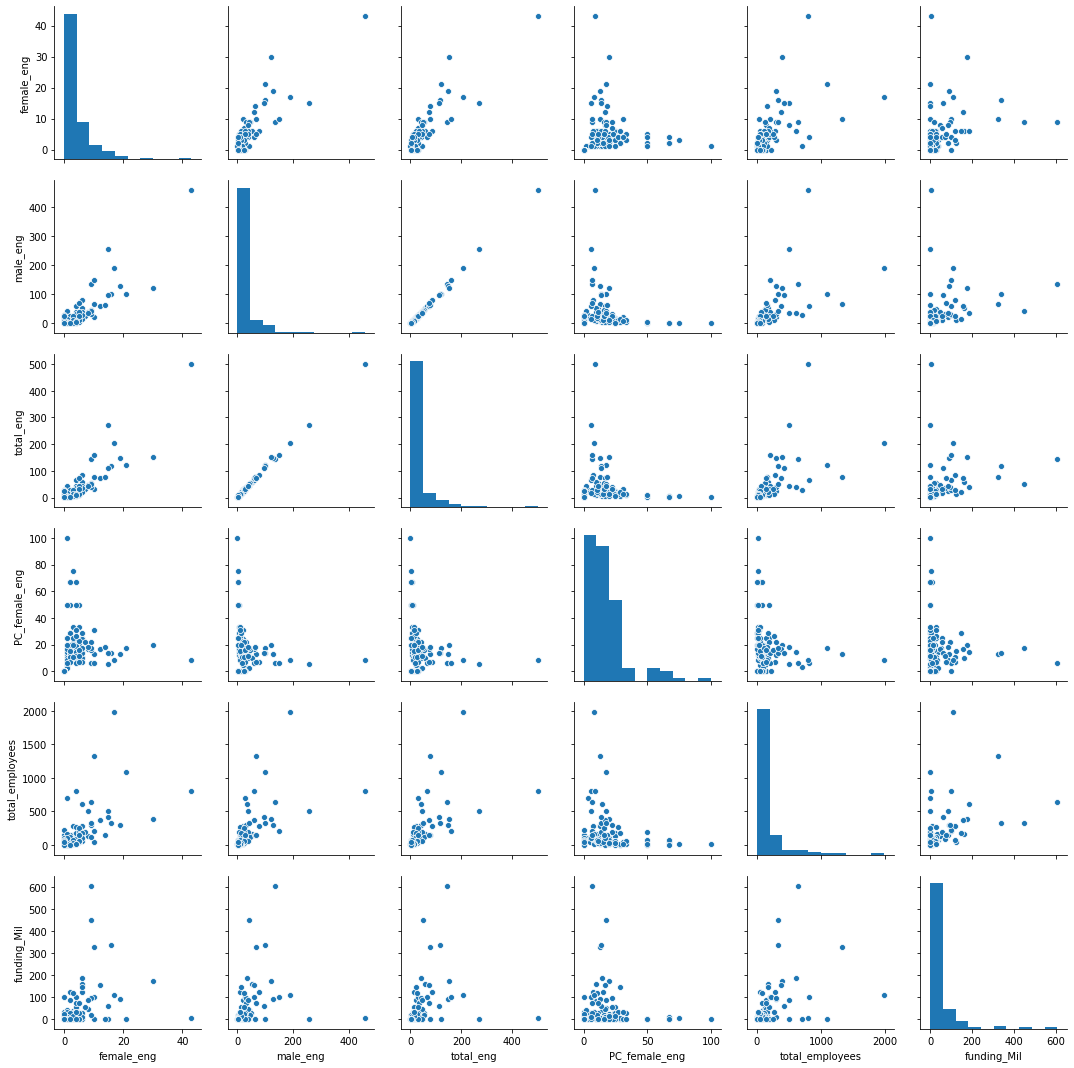

In [29]:
# Creating a pair plot to see any interesting findings
sns.pairplot(tech)

An examination of the pair plot allows one to look at the bigger picture and compare the plots. By the eye the relationship of company funding on females and males seems to be interesting.

A closer examination by eye shows that there are slight differences in the number of female and male engineers based on the funding. Specifically, it appears that as funding increases male engineers are more likely to gravitate toward better funded companies. Female engineers are slightly more stacked to companies with lesser funding.

Further reasoning as to the core causes of this difference is beyond the scope of this project. Nonetheless, it is be an area that could yield interesting results for future projects.

In [30]:
# Calculating the percentage of male engineers
tech['PC_male_eng'] = tech['male_eng']/tech['total_eng'] * 100
tech.head().round(2)

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software,100.00
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.24
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.67
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.00
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.84


The percentages of male engineers based on the total number of employees is calculated for future use.

### 3.3.2 Female Engineers per Company Category

In [31]:
# The number of female engineers in each category.
tech.groupby('Category').sum().round(2)

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil,PC_male_eng
Category,,,,,,,
Advertising,28,165,193,155.40,871.0,90.69,644.60
Analytics/Big Data,9,53,62,50.95,218.0,70.50,249.06
Charity/Nonprofit,9,94,103,64.76,266.0,91.90,235.24
Consulting,12,62,74,62.41,120.0,0.00,237.59
Consumer Web,174,1309,1483,525.58,6610.0,1392.25,2274.41
Education,20,151,171,209.96,865.0,210.12,890.04
Enterprise,26,165,191,78.69,984.0,170.55,621.31
Finance/Venture,13,55,68,81.60,521.0,99.10,318.40
Games/Entertainment,1,29,30,3.33,706.0,0.00,96.67


In [32]:
female_eng_byCategory = tech.groupby('Category').sum()['female_eng']
female_eng_byCategory

Category
Advertising             28
Analytics/Big Data       9
Charity/Nonprofit        9
Consulting              12
Consumer Web           174
Education               20
Enterprise              26
Finance/Venture         13
Games/Entertainment      1
Hardware                16
Health/CleanTech        21
Mobile/Wireless         14
News/Media              14
Social Networking       33
Software                93
eCommerce/Fashion       38
Name: female_eng, dtype: int64

In [33]:
total_eng_byCategory = tech.groupby('Category').sum()['total_eng']
total_eng_byCategory

Category
Advertising             193
Analytics/Big Data       62
Charity/Nonprofit       103
Consulting               74
Consumer Web           1483
Education               171
Enterprise              191
Finance/Venture          68
Games/Entertainment      30
Hardware                280
Health/CleanTech        116
Mobile/Wireless         161
News/Media              111
Social Networking       254
Software                747
eCommerce/Fashion       225
Name: total_eng, dtype: int64

In [34]:
# The ratio of female_eng_byCategory by total_eng_byCategory
percentage = female_eng_byCategory/total_eng_byCategory*100
percentage.round(2)

Category
Advertising            14.51
Analytics/Big Data     14.52
Charity/Nonprofit       8.74
Consulting             16.22
Consumer Web           11.73
Education              11.70
Enterprise             13.61
Finance/Venture        19.12
Games/Entertainment     3.33
Hardware                5.71
Health/CleanTech       18.10
Mobile/Wireless         8.70
News/Media             12.61
Social Networking      12.99
Software               12.45
eCommerce/Fashion      16.89
dtype: float64

### 3.4 K-means Clustering

### Using K-means To Predict the Ratio of Female Engineers by Company Categories

In [35]:
# The percentage of female engineers sorted by the value
percentage.sort_values(ascending=False).round(2)

Category
Finance/Venture        19.12
Health/CleanTech       18.10
eCommerce/Fashion      16.89
Consulting             16.22
Analytics/Big Data     14.52
Advertising            14.51
Enterprise             13.61
Social Networking      12.99
News/Media             12.61
Software               12.45
Consumer Web           11.73
Education              11.70
Charity/Nonprofit       8.74
Mobile/Wireless         8.70
Hardware                5.71
Games/Entertainment     3.33
dtype: float64

In [36]:
# import libraries
from sklearn import metrics
from sklearn.cluster import KMeans

In [37]:
# To build a dataframe by framing 'percentage' female_byCategory into 'X_in'
X_in = percentage.to_frame()
X_in.head()

,0
Category,
Advertising,14.507772
Analytics/Big Data,14.516129
Charity/Nonprofit,8.737864
Consulting,16.216216
Consumer Web,11.732974


In [38]:
# Rename column '0'
X_in.rename(columns={0: "PC_female_byCategory"}).round(2)

,PC_female_byCategory
Category,
Advertising,14.51
Analytics/Big Data,14.52
Charity/Nonprofit,8.74
Consulting,16.22
Consumer Web,11.73
Education,11.70
Enterprise,13.61
Finance/Venture,19.12
Games/Entertainment,3.33


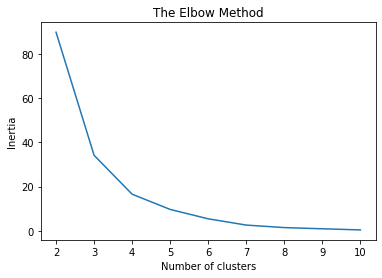

In [39]:
# Using the Elbow method to find the optimal number of clusters.
# By an elbow curve, where the x-axis represents the number of clusters and the y-axis is the evaluation metric.
# Create a kmeans function and fit it on the data 'X_in'

inertias = []
for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_in)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 11), inertias)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Findings

As the above figure shows, the optimal number of clusters should be 4. Because when we changed the cluster value from 3 to 4, the inertia value reduced very sharply. This decrease in the inertia value reduces and eventually becomes constant as we increase the number of clusters further. In this chart, we could choose the optimal cluster between 4 and 6. When we choose the optimal number of clusters, the computation cost also needs to be considered. More clusters will have more computation cost. A lesser number of clusters will cost less. That is why we choose k = 4 as our optimal number of cluster. 

In [40]:
# Applying k-means clustering to the 'X_in' dataframe
kmeans = KMeans(n_clusters = 4)

# Fitting
y_kmeans = kmeans.fit_predict(X_in)

# Prediction
prediction_kmeans = kmeans.predict(X_in)
print(prediction_kmeans)

[0 0 3 2 0 0 0 2 1 1 2 3 0 0 0 2]


In [41]:
# inertia on the fitted data 
kmeans.inertia_

16.51557696593936

Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster. The lesser the inertia value, the better our clusters are.

In [42]:
# The centers of clusters
kmeans.cluster_centers_

array([[13.01498555],
       [ 4.52380952],
       [17.58155011],
       [ 8.71675813]])

In [43]:
# Number of points in each cluster
X_in['i'] = prediction_kmeans
X_in['i'].value_counts()

0    8
2    4
3    2
1    2
Name: i, dtype: int64

In [44]:
# To link the categories with the indexes
Centroids = (X_in.sample(n=16))
Centroids.round(2)

,0,i
Category,,
Advertising,14.51,0
eCommerce/Fashion,16.89,2
News/Media,12.61,0
Software,12.45,0
Hardware,5.71,1
Enterprise,13.61,0
Games/Entertainment,3.33,1
Analytics/Big Data,14.52,0
Finance/Venture,19.12,2


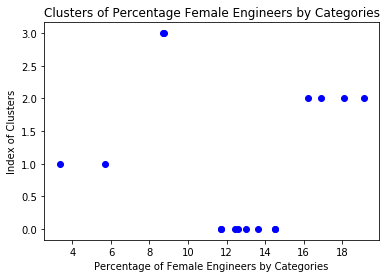

In [45]:
# Plotting clusters
plt.scatter(X_in[0], X_in['i'], c='blue')
plt.title('Clusters of Percentage Female Engineers by Categories')
plt.xlabel('Percentage of Female Engineers by Categories')
plt.ylabel('Index of Clusters')
plt.show()


## 4. Analysis

### The Representation of Women in Tech

__While we have been hearing that women in tech is underrepresented, shouldn't we verify it?__

In [46]:
Female_Engineers = tech.female_eng.sum(axis=0, skipna=True)
Male_Engineers = tech.male_eng.sum(axis=0, skipna=True)
Total_Engineers = tech.total_eng.sum(axis=0, skipna=True)
print("A study of the companies shows that there is a grand total of {} engineers in the dataset.\n".format(Total_Engineers))
print("The total can be broken down by genders as follows:\n")
print("- Female Engineers: {}\n".format(Female_Engineers))
print("- Male Engineers: {}".format(Male_Engineers))

A study of the companies shows that there is a grand total of 4269 engineers in the dataset.

The total can be broken down by genders as follows:

- Female Engineers: 521

- Male Engineers: 3748


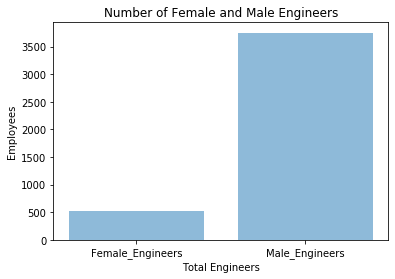

In [47]:
objects = ('Female_Engineers', 'Male_Engineers')
y_pos = np.arange(len(objects))
Number = [Female_Engineers, Male_Engineers]

plt.bar(y_pos, Number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Total Engineers')
plt.ylabel('Employees')
plt.title('Number of Female and Male Engineers')
plt.rcParams['figure.figsize']=(10,5) # Change Fig size
plt.show()

### Observations on the Number of Women in the Tech Sector
Women are fewer in number in the tech sector than men. This is because mainly they're underpaid, often passed for promotions and faced with everyday sexism.

Vanessa Vallely, founder of membership organisation WeAreTechWomen says: "Women just aren’t getting promoted into senior tech roles. For all such reasons, women are more likely to leave the industry as compared to their male counterparts, so we don't see many women in tech world."

#### Female Engineers per Company Category

In [48]:
# The cluster with the lowest percentage of female engineers
pc_low = tech[(tech.Category.isin(['Games/Entertainment', 'Hardware']))]
pc_low.round(2)

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
2,Activision,1,29,30,3.33,706.0,CA,0.0,Games/Entertainment,96.67
74,"Qualcomm, Austin",15,256,271,5.54,500.0,TX,0.0,Hardware,94.46
90,Sifteo,0,4,4,0.00,25.0,CA,16.5,Hardware,100.00
106,Tindie,1,4,5,20.00,10.0,CA,0.5,Hardware,80.00


In [49]:
# The cluster with the highest percentage of female engineers
pc_high = tech[(tech.Category.isin(['Finance/Venture', 'Consulting', 'eCommerce/Fashion', 'Health/CleanTech']))]
pc_high.round(2)

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
10,Checkout 51,0,6,6,0.00,46.0,Ontario,0.00,Health/CleanTech,100.00
17,Datascope Analytics,2,5,7,28.57,8.0,IL,0.00,Consulting,71.43
19,doxo,0,7,7,0.00,18.0,WA,18.80,eCommerce/Fashion,100.00
22,elationemr,1,3,4,25.00,13.0,CA,0.00,Health/CleanTech,75.00
24,Etsy,19,130,149,12.75,300.0,NY,91.70,eCommerce/Fashion,87.25
26,Flatiron Health,1,6,7,14.29,24.0,NY,8.00,Health/CleanTech,85.71
33,Goldbely,0,3,3,0.00,5.0,CA,3.00,eCommerce/Fashion,100.00
46,Indiegogo,4,12,16,25.00,185.0,CA,56.60,Finance/Venture,75.00
52,Kiva,3,21,24,12.50,291.0,CA,9.00,Finance/Venture,87.50
65,OmniTI,5,17,22,22.73,50.0,MD,0.00,Consulting,77.27


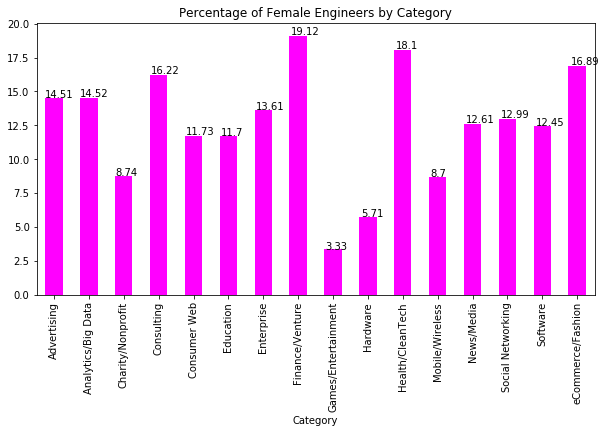

In [50]:
female_eng_byCategory = tech.groupby('Category').sum()['female_eng']
total_eng_byCategory = tech.groupby('Category').sum()['total_eng']
Percentage_byCategory = (female_eng_byCategory/total_eng_byCategory*100).round(2)
ax = Percentage_byCategory.plot.bar(x='Category', rot=90, color="magenta")
plt.rcParams['figure.figsize']=(14,10) # Change Fig size
plt.title('Percentage of Female Engineers by Category')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


### Findings
The number of women in the games and entertainment category is very low. While our dataset is limited in its depth and was written in 2014 we believe that this is a fact that holds true even today.

We believe that there can be several reasons behind this: Apart from being paid less women are offered lower job stability, and are provided inadequate health benefits as compared to Finance, Health or eCommerce categories, where the number of female engineers is the highest. Also, women seem to receive limited recognition for their work. Yet another reason can be that many people in gaming are required to chase jobs all over the country, often moving from coast to coast every few years and women are not more likely to travel that often.

When all these elements are combined together our team believes that it leads to the situation where men continue to dominate the technical fields of work.

### The Number of Female Engineers by Location

In [51]:
# Creating a new dataframe, where we
# Remove all rows from female eng with 0 values
tech_df2 = tech[(tech[['female_eng']] != 0).all(axis=1)]
tech_df2

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.238095
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.666667
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.000000
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.842105
6,Asana,3,18,21,14.29,74.0,CA,38.20,Software,85.714286
...,...,...,...,...,...,...,...,...,...,...
114,Webkite,4,4,8,50.00,14.0,PA,0.00,Consumer Web,50.000000
115,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.243243
116,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.333333
117,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.747573


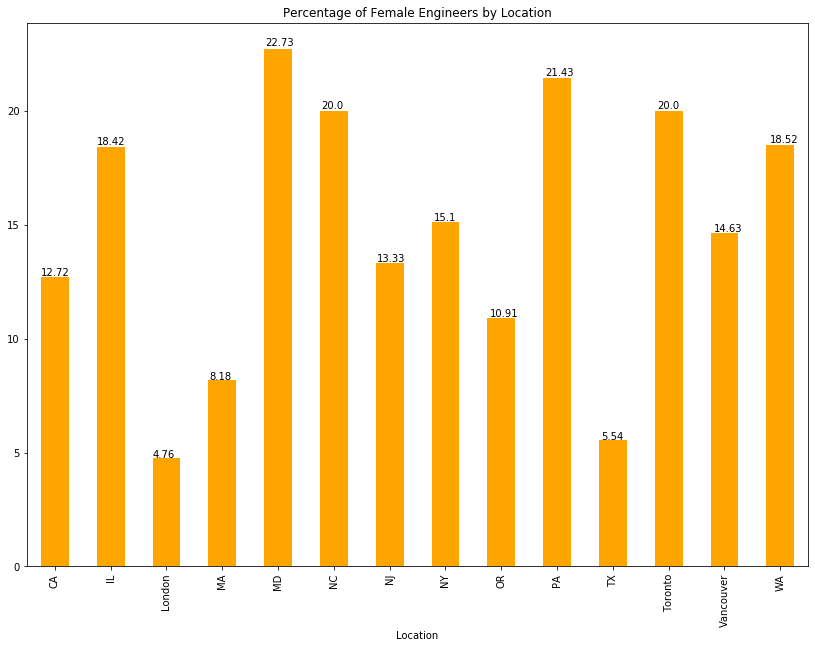

In [52]:
Female_Eng_byLocation = tech_df2.groupby('Location').sum()['female_eng']
Total_Eng_byLocation = tech_df2.groupby('Location').sum()['total_eng']
Percentage_byLocation = (Female_Eng_byLocation/Total_Eng_byLocation * 100).round(2)
ax = Percentage_byLocation.plot.bar(x='female_eng', y='Location', rot=90, color = 'Orange')
plt.rcParams['figure.figsize']=(10,6)
plt.title('Percentage of Female Engineers by Location')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Findings

Since our dataset contains company data collected mainly from the United States the chart seen above is indicative only. It has been included because our team believes that charts like this can be very helpful to assist a reader in understanding a dataset's contents at a glance. Further, our team believes that the distribution of locations is important to display to add transparency to the dataset.

## 5. Conclusion

- Men continue to dominate the tech world. Many tech companies are run by men. The main reason for the small number of women in technology is due to the lack of role-models for women within the sector and this is mainly down to the gender stereotype of "boys being better at science and maths".
- Women are paid less than men for doing the same job, often passed for promotions and faced with every daysexism. For the same reason women are more likely to leave the industry within a year compared to their male counterparts.
- The first step to resolve this issue is to make the environment more tolerable for women by providing for workers' basic needs and women should also always be treated equally.

#### Why Do We Need More Women in Technology?
- Most imortantly, gender diversity benefits all companies.
- According to the researchers at the University of Castilla la Mancha in Spain, gender diverse Research & Design teams lead to greater creativity and better decisions.
- Sectors where employee engagement and satisfaction are reflected by the quality of the product or service, gender diversity is especially important, according to Morgan Stanley. 
- Women-led tech companies outperform men-led tech companies on efficiency and productivity and women in leadership roles can contribute to the diversity of a workforce.
- Getting more women into tech roles today can help break the cycle of a male-dominated industry and fill the STEM talent demand.
- Higher gender diversity teams not only enjoy better returns, but lower volatility.
 
__Our team would like to leave you with this quote attributed to Sheryl Sandberg, Chief Operating Officer of Facebook: "It's our responsibility as a society to make sure that we all - together as one - move forward."__

## 6. References

__Main References__

- Siegel, T. 2014. Women-in-tech. GitHub repository. URL: https://github.com/tarasiegel/women-in-tech. Accessed: April 2020.

- Siegel, T. 2014. Companies.csv. Comma-separated values file. URL: https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv. Accessed: March 2020.

All of the data used in this project comes from Tara Siegel's dataset, which can be found on her GitHub repository. For a more detailed description of the dataset please see chapter 2. Dataset.

- The Shortcut Oy. 2020. Python for Data Analysis training program. Helsinki, Finland.

The primary source of the programming language, the various techniques and their application was gained from the Python for Data Analysis training program.

- Wikipedia. 2020. Grace Hopper. Internet article. URL: https://en.wikipedia.org/wiki/Grace_Hopper. Accessed: April 2020.

The research on the column titled "grace_hopper" was based on findings from the Wikipedia due to time constraints.

__Further Research's References__

Our team did additional research on the topic of women in tech. These references can be found below.

- Concordia University. 2019. The need for women in techonology. Internet article. URL: https://venturebeat.com/2019/03/27/the-need-for-women-in-technology. Accessed: April 2020.

- Little, J. 2020. Ten years on, why are there still so few women in tech? Internet article. URL: https://www.theguardian.com/careers/2020/jan/02/ten-years-on-why-are-there-still-so-few-women-in-tech. Accessed: April 2020.

- Next Generation. 2020. Why Aren't There More Women in Tech? Internet article. URL: https://www.nextgeneration.ie/blog/2018/08/why-arent-there-more-women-in-tech. Accessed: April 2020.

- Wallace, F. 2019. Why Aren't There More Women In The Gaming Industry? Internet article. URL: https://www.headstuff.org/entertainment/gaming/more-women-gaming-industry. Accessed: April 2020.

__Thanks__

The authors wish to thank all of the instructors of the Python Training Program: Rohan, Thao, Son, Ali, Vinh and all the others! It is because of your expertise of Python and Machine Learning and your willingness to help us to learn and apply our knowledge that this project could be made a reality! Thank you all so much!

The authors would also like to thank the organizers of the Python Training Program! You have made it all possible by creating the program, scheduled the contents, provided the premises (both physical and digital workspaces). Also, you have asked us for our feedback and implemented changes based on that. Thank you everyone at The Shortcut Oy!

Finally thank you dear reader for your interest in this final project made by Team "Diversity-in-Tech"!